<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/Genetic_alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

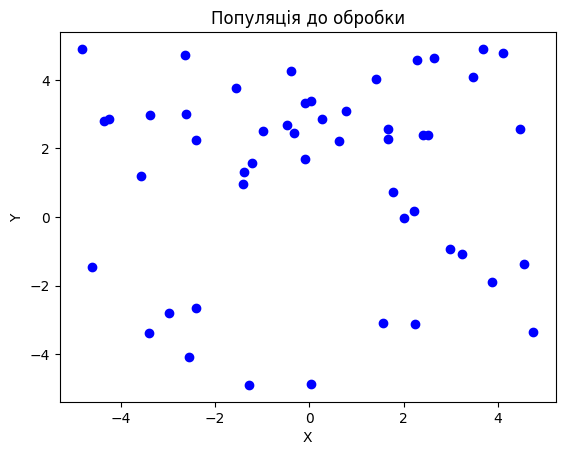

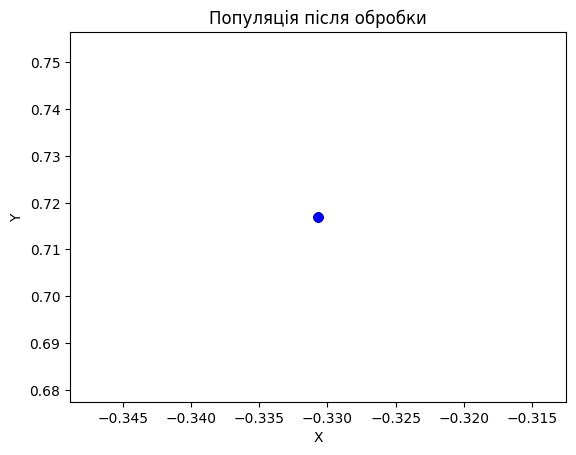

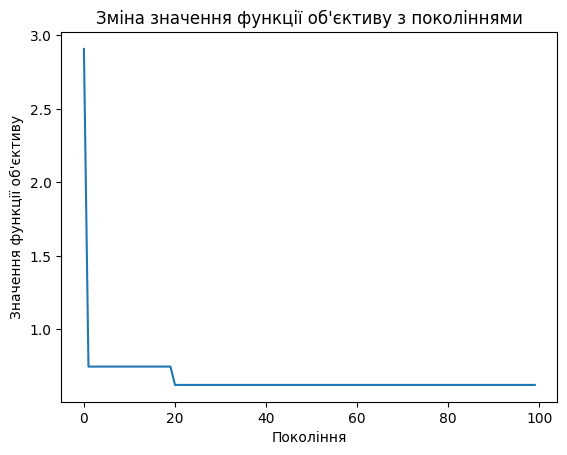

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Функція для обчислення значення функції для оптимізації (мінімізації)
def objective_function(x):
    return sum(xi ** 2 for xi in x)

# Функція для створення випадкової особини
def create_individual(search_space):
    return [random.uniform(search_space[i][0], search_space[i][1]) for i in range(len(search_space))]

# Функція для створення початкової популяції
def initialize_population(population_size, search_space):
    return [create_individual(search_space) for _ in range(population_size)]

# Функція для візуалізації популяції
def plot_population(population, title):
    plt.scatter([individual[0] for individual in population], [individual[1] for individual in population], color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

# Функція для візуалізації зміни значення функції об'єктиву з поколіннями
def plot_objective_values(best_objective_values):
    plt.plot(best_objective_values)
    plt.xlabel('Покоління')
    plt.ylabel('Значення функції об\'єктиву')
    plt.title('Зміна значення функції об\'єктиву з поколіннями')
    plt.show()

# Функція для проведення селекції за турнірним методом
def tournament_selection(population, objective_function, tournament_size):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: objective_function(x))
    return tournament[0]

# Функція для проведення кросовера між двома батьками
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Функція для проведення мутації для окремої особини
def mutate(individual, mutation_rate, search_space):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.uniform(search_space[i][0], search_space[i][1])
    return individual

# Функція для запуску генетичного алгоритму
def genetic_algorithm(population_size, search_space, max_generations, tournament_size, mutation_rate):
    population = initialize_population(population_size, search_space)
    best_objective_values = []

    # Візуалізація популяції до обробки
    plot_population(population, 'Популяція до обробки')

    for generation in range(max_generations):
        # Вибір батьків
        parent1 = tournament_selection(population, objective_function, tournament_size)
        parent2 = tournament_selection(population, objective_function, tournament_size)

        # Кросовер
        child1, child2 = crossover(parent1, parent2)

        # Мутація
        child1 = mutate(child1, mutation_rate, search_space)
        child2 = mutate(child2, mutation_rate, search_space)

        # Додавання дітей до популяції
        population.extend([child1, child2])

        # Відсортувати популяцію за значенням функції об'єктиву та обмежити розмір популяції
        population.sort(key=lambda x: objective_function(x))
        population = population[:population_size]

        # Зберігання кращого розв'язку
        best_objective_values.append(objective_function(population[0]))

    # Візуалізація популяції після обробки
    plot_population(population, 'Популяція після обробки')

    # Візуалізація зміни значення функції об'єктиву з поколіннями
    plot_objective_values(best_objective_values)

# Параметри генетичного алгоритму
population_size = 50
search_space = [(-5, 5)] * 2
max_generations = 100
tournament_size = 3
mutation_rate = 0.1

# Запуск генетичного алгоритму
genetic_algorithm(population_size, search_space, max_generations, tournament_size, mutation_rate)
